In [6]:
import numpy as np
from diffpy.pdfgetx import PDFGetter, loadPDFConfig, findfiles
import matplotlib.pyplot as plt
import os


### First, give inputs for data names and summation
# directory = os.getcwd() + '/11-pdfgetx-simple/'
directory = '/mxn/groups/kits/scisw/jupyterhub/jupyter-notebook-validation/notebooks/maxiv/danmax/11-pdfgetx-simple/'
frame = 'TiCu_amorph.xy'  # define sample filepattern - example: DSPfs-1-insitu-00010_qspace.chi
frame_data = np.loadtxt(directory + frame, skiprows=23)
q = frame_data[:,0]
Iq = frame_data[:,1]

### Read the background file
background = np.loadtxt(directory + 'Air_scatt_bkg.xy', skiprows=23)
background_intensity = background[:,1]


In [7]:
##Finds the right background scaling parameter
scale = 5.0
diff = Iq-scale*background_intensity
while np.any(diff<0.)==True:
    diff = Iq - scale * background_intensity
    scale = scale-0.002
    
print(scale)

plt.plot(q, Iq)
plt.plot(q, background_intensity*scale)

0.8980000000003294


In [8]:
##Background subtraction
data_subtracted = Iq - scale * background_intensity

# Do the PDFing and export I(Q), S(Q), F(Q) and G(r)
cfg = loadPDFConfig(directory + 'pdfgetx3.cfg')
pg = PDFGetter(config=cfg)
data_gr = pg(q, data_subtracted)
# (q_iq, data_iq) = (pg.iq[0], pg.iq[1])
(q_sq, data_sq) = (pg.sq[0], pg.sq[1])
(q_fq, data_fq) = (pg.fq[0], pg.fq[1])
(r_gr, data_gr) = (pg.gr[0], pg.gr[1])

name = frame.replace('.xy','')
np.savetxt(directory + name + '.gr', np.column_stack((r_gr,data_gr)))

In [9]:
##Plots I(Q), S(Q) and F(Q)
# plt.plot(q_iq, data_iq*0.00003)
plt.plot(q_sq, data_sq)
plt.plot(q_fq, data_fq * 0.5)

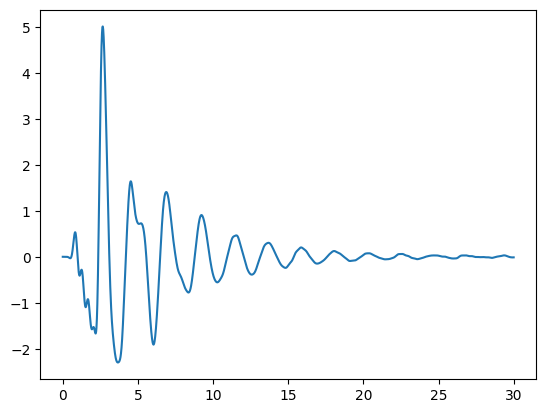

In [10]:
##Plots G(r)
plt.plot(r_gr, data_gr)